<a href="https://colab.research.google.com/github/yusufdimari/deep_learning/blob/main/CNN_CNNDeeper_Emotions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model

import numpy as np
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
# Load the facial expression data
faces = np.load('Facial expression.npy')
labels = np.load('Facial expression label.npy')

# Check the shape of the data
print(f"Faces shape: {faces.shape}")
print(f"Labels shape: {labels.shape}")


Faces shape: (19950, 48, 48, 3)
Labels shape: (19950, 4)


In [ ]:
print(labels[0])

[0. 0. 0. 1.]


In [5]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(faces, labels, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras import models, layers

# Simple CNN model
model_cnn = models.Sequential([
    layers.Input(shape=(48, 48, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Train the model
history_cnn = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.3572 - loss: 6.7719 - val_accuracy: 0.4822 - val_loss: 1.1757
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5524 - loss: 1.0791 - val_accuracy: 0.5982 - val_loss: 0.9770
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6278 - loss: 0.9135 - val_accuracy: 0.6223 - val_loss: 0.9198
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6767 - loss: 0.8005 - val_accuracy: 0.6536 - val_loss: 0.8654
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7236 - loss: 0.6999 - val_accuracy: 0.6426 - val_loss: 0.9331
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7592 - loss: 0.6139 - val_accuracy: 0.6571 - val_loss: 0.8985
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8094 - loss: 0.4969 - val_accuracy: 0.6679 - val_loss: 1.0379
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8587 - loss: 0.3773 - val_accuracy: 

In [ ]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6596 - loss: 2.6586
Simple CNN Test Accuracy: 0.6674


In [ ]:
# Create an image data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Random rotation (up to 15 degrees)
    width_shift_range=0.1,  # Horizontal shift (10% of width)
    height_shift_range=0.1,  # Vertical shift (10% of height)
    zoom_range=0.1,  # Random zoom
    horizontal_flip=True  # Random horizontal flip
)

# Fit the generator to the training data
datagen.fit(X_train)

# Train the model with augmented data
history_augmented = model_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=64),  # Use generator
    validation_data=(X_val, y_val),
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.3971 - loss: 1.5675 - val_accuracy: 0.5985 - val_loss: 0.9738
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.5496 - loss: 1.0799 - val_accuracy: 0.6521 - val_loss: 0.8680
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.5876 - loss: 1.0024 - val_accuracy: 0.6471 - val_loss: 0.8672
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.6125 - loss: 0.9460 - val_accuracy: 0.6767 - val_loss: 0.8478
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.6163 - loss: 0.9414 - val_accuracy: 0.6907 - val_loss: 0.8057
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.6417 - loss: 0.8926 - val_accuracy: 0.6862 - val_loss: 0.8181
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.6498 - loss: 0.8678 - val_accuracy: 0.6977 - val_loss: 0.7853
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.6588 - loss: 0.8493 - val_accurac

In [ ]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7056 - loss: 0.7473
Simple CNN Test Accuracy: 0.7213


In [ ]:
model_cnn_improved = models.Sequential([
    layers.Input(shape=(48, 48, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Normalize activations
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Add dropout for regularization

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile the improved model
model_cnn_improved.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the improved model
history_improved  = model_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Use generator
    validation_data=(X_val, y_val),
    epochs=30
)


Epoch 1/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.6866 - loss: 0.7825 - val_accuracy: 0.7145 - val_loss: 0.7474
Epoch 2/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.6914 - loss: 0.7807 - val_accuracy: 0.7050 - val_loss: 0.7840
Epoch 3/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6874 - loss: 0.7751 - val_accuracy: 0.7253 - val_loss: 0.7312
Epoch 4/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.7042 - loss: 0.7504 - val_accuracy: 0.7323 - val_loss: 0.7233
Epoch 5/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6924 - loss: 0.7594 - val_accuracy: 0.7381 - val_loss: 0.7007
Epoch 6/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.7013 - loss: 0.7488 - val_accuracy: 0.7168 - val_loss: 0.7562
Epoch 7/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7041 - loss: 0.7529 - val_accuracy: 0.7378 - val_loss: 0.7141
Epoch 8/30
499/499 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.7067 - loss: 0.7439 - 

In [ ]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7294 - loss: 0.6992
Simple CNN Test Accuracy: 0.7469


In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,  # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

model_cnn_improved = models.Sequential([
    layers.Input(shape=(48, 48, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Normalize activations
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Add dropout for regularization

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile the improved model
model_cnn_improved.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the improved model
history_improved  = model_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Use generator
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


499/499 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.7305 - loss: 0.6811 - val_accuracy: 0.7461 - val_loss: 0.6705
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7362 - loss: 0.6739 - val_accuracy: 0.7368 - val_loss: 0.7073
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7361 - loss: 0.6953 - val_accuracy: 0.7481 - val_loss: 0.6818
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.7354 - loss: 0.6821 - val_accuracy: 0.7414 - val_loss: 0.6866
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7440 - loss: 0.6535 - val_accuracy: 0.7306 - val_loss: 0.7242
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.7367 - loss: 0.6704 - val_accuracy: 0.7426 - val_loss: 0.6933
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7404 - loss: 0.6669 - val_accuracy: 0.7409 - val_loss: 0.6920
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.7379 - loss: 0.6720 - val_accurac

In [ ]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7501 - loss: 0.6821
Simple CNN Test Accuracy: 0.7569


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,  # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

model_cnn_improved = models.Sequential([
    layers.Input(shape=(48, 48, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Normalize activations
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Add dropout for regularization

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile the improved model
model_cnn_improved.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the improved model
history_improved  = model_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=16),  # Use generator
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


998/998 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7094 - loss: 0.7495 - val_accuracy: 0.7278 - val_loss: 0.7237
Epoch 2/50
998/998 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.7148 - loss: 0.7378 - val_accuracy: 0.7283 - val_loss: 0.7426
Epoch 3/50
998/998 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.7135 - loss: 0.7291 - val_accuracy: 0.7368 - val_loss: 0.7130
Epoch 4/50
998/998 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7174 - loss: 0.7362 - val_accuracy: 0.7331 - val_loss: 0.7424
Epoch 5/50
998/998 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.7217 - loss: 0.7052 - val_accuracy: 0.7446 - val_loss: 0.6949
Epoch 6/50
998/998 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7226 - loss: 0.7253 - val_accuracy: 0.7421 - val_loss: 0.7161
Epoch 7/50
998/998 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7156 - loss: 0.7280 - val_accuracy: 0.7381 - val_loss: 0.7274
Epoch 8/50
998/998 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.7202 - loss: 0.7229 - val_accurac

In [ ]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7409 - loss: 0.7481
Simple CNN Test Accuracy: 0.7471


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=10,  # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

model_cnn_improved = models.Sequential([
    layers.Input(shape=(48, 48, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Normalize activations
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Add dropout for regularization

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile the improved model
model_cnn_improved.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the improved model
history_improved  = model_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=8),  # Use generator
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6747 - loss: 0.8257 - val_accuracy: 0.7293 - val_loss: 0.7428
Epoch 2/50
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6945 - loss: 0.7933 - val_accuracy: 0.7175 - val_loss: 0.7666
Epoch 3/50
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6836 - loss: 0.8127 - val_accuracy: 0.7075 - val_loss: 0.7855
Epoch 4/50
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6839 - loss: 0.8023 - val_accuracy: 0.7243 - val_loss: 0.7286
Epoch 5/50
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6833 - loss: 0.8202 - val_accuracy: 0.7083 - val_loss: 0.8172
Epoch 6/50
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6877 - loss: 0.8048 - val_accuracy: 0.7195 - val_loss: 0.7586
Epoch 7/50
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.6883 - loss: 0.8002 - val_accuracy: 0.7018 - val_loss: 0.7845
Epoch 8/50
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.6724 -

In [ ]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.7745
Simple CNN Test Accuracy: 0.7293


In [6]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,  # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

model_cnn_improved = models.Sequential([
    layers.Input(shape=(48, 48, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Normalize activations
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Add dropout for regularization

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile the improved model
model_cnn_improved.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Create an image data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Random rotation (up to 15 degrees)
    width_shift_range=0.1,  # Horizontal shift (10% of width)
    height_shift_range=0.1,  # Vertical shift (10% of height)
    zoom_range=0.1,  # Random zoom
    horizontal_flip=True  # Random horizontal flip
)

# Fit the generator to the training data
datagen.fit(X_train)

# Train the improved model
history_improved  = model_cnn_improved.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Use generator
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


499/499 ━━━━━━━━━━━━━━━━━━━━ 44s 66ms/step - accuracy: 0.3093 - loss: 2.4842 - val_accuracy: 0.4301 - val_loss: 1.3062
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.3532 - loss: 1.3553 - val_accuracy: 0.4446 - val_loss: 1.2584
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.3680 - loss: 1.3214 - val_accuracy: 0.4544 - val_loss: 1.2512
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.3918 - loss: 1.2987 - val_accuracy: 0.4857 - val_loss: 1.1873
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.4138 - loss: 1.2687 - val_accuracy: 0.4830 - val_loss: 1.1902
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.4505 - loss: 1.2190 - val_accuracy: 0.5554 - val_loss: 1.0757
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.4738 - loss: 1.1874 - val_accuracy: 0.4346 - val_loss: 1.3378
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.5001 - loss: 1.1420 - val_accurac

In [8]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model_cnn_improved.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7740 - loss: 0.6167
Simple CNN Test Accuracy: 0.7832


In [17]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,  # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)

model_cnn_improved = models.Sequential([
    layers.Input(shape=(48, 48, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),  # Normalize activations
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Add dropout for regularization

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    # layers.BatchNormalization(),
    # layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Compile the improved model
model_cnn_improved.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Create an image data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Random rotation (up to 15 degrees)
    width_shift_range=0.1,  # Horizontal shift (10% of width)
    height_shift_range=0.1,  # Vertical shift (10% of height)
    zoom_range=0.1,  # Random zoom
    horizontal_flip=True  # Random horizontal flip
)

# Fit the generator to the training data
datagen.fit(X_train)

# Train the improved model
history_improved  = model_cnn_improved.fit(
    datagen.flow(X_train, y_train, batch_size=128),  # Use generator
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 189ms/step - accuracy: 0.3139 - loss: 2.0106 - val_accuracy: 0.3474 - val_loss: 1.3312
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 135ms/step - accuracy: 0.3809 - loss: 1.3193 - val_accuracy: 0.4401 - val_loss: 1.2417
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.3789 - loss: 1.3081 - val_accuracy: 0.4912 - val_loss: 1.1883
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.4183 - loss: 1.2793 - val_accuracy: 0.5098 - val_loss: 1.1445
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.4258 - loss: 1.2619 - val_accuracy: 0.5130 - val_loss: 1.1331
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.4361 - loss: 1.2378 - val_accuracy: 0.5434 - val_loss: 1.0655
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.4637 - loss: 1.2012 - val_accuracy: 0.5624 - val_loss: 1.0474
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.4744 - loss: 1

In [18]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model_cnn_improved.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7571 - loss: 0.6666
Simple CNN Test Accuracy: 0.7689


In [19]:
model_cnn_improved.save('cnn_improved.h5')
model_cnn_improved.save('cnn_improved.keras')
model_cnn_improved.save_weights('cnn_improved.weights.h5')

In [1]:
from keras.models import load_model
model=load_model('/content/cnn_improved.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [2]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,465,482 (20.85 MB)

 Trainable params: 2,732,292 (10.42 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2,732,294 (10.42 MB)

In [6]:
history=model.predict(X_val)

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [7]:
print(history)

[[6.7191735e-02 2.6345946e-02 5.2762365e-01 3.7883866e-01]
 [1.1858438e-01 8.4887755e-01 2.1582043e-02 1.0955965e-02]
 [3.7398246e-01 1.6006909e-01 3.4091446e-01 1.2503400e-01]
 ...
 [8.1758104e-02 1.5709692e-01 7.5512654e-01 6.0184244e-03]
 [2.3866026e-02 2.7794903e-03 4.0175600e-04 9.7295278e-01]
 [4.8105784e-02 1.0322906e-02 9.2770427e-01 1.3867097e-02]]


In [10]:
# Evaluate Simple CNN
test_loss_cnn, test_acc_cnn = model.evaluate(X_val, y_val)
print(f"Simple CNN Test Accuracy: {test_acc_cnn:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7571 - loss: 0.6666
Simple CNN Test Accuracy: 0.7689


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


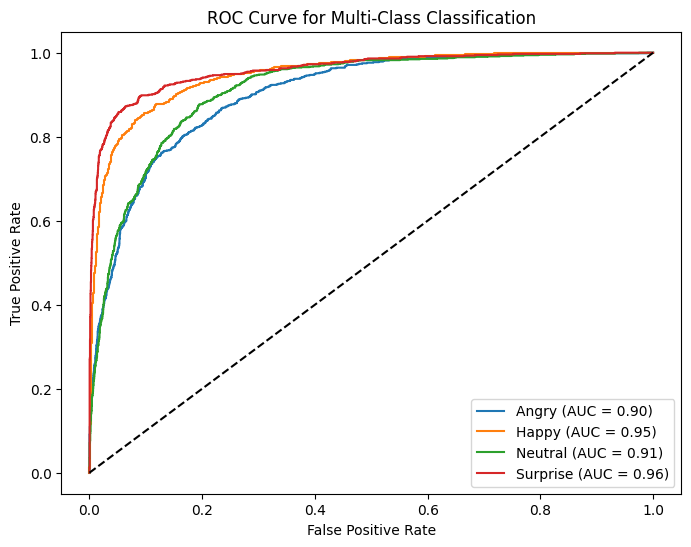

In [16]:
emotions=['Angry', 'Happy', 'Neutral','Surprise']

# Predict probabilities for the validation set
y_pred_prob = model.predict(X_val)

# Binarize the labels for multi-class ROC curve
y_val_bin = label_binarize(np.argmax(y_val, axis=1), classes=np.arange(4))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(emotions)):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(emotions)):
    plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

##Model 2

In [20]:
# Define a deeper CNN model
model_cnn_deeper = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    # Global Average Pooling and Dense Layers
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes for output
])

# Compile the model
model_cnn_deeper.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model_cnn_deeper.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 322,852 (1.23 MB)

 Trainable params: 321,956 (1.23 MB)

 Non-trainable params: 896 (3.50 KB)

In [21]:
imageGenerator=ImageDataGenerator(
    rotation_range=15,  # Random rotation (up to 15 degrees)
    width_shift_range=0.1,  # Horizontal shift (10% of width)
    height_shift_range=0.1,
    zoom_range=0.1,  # Random zoom
    horizontal_flip=True  # Random horizontal flip
)
imageGenerator.fit(X_train)

In [22]:
# Train the deeper CNN model
history_cnn_deeper = model_cnn_deeper.fit(
    imageGenerator.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


499/499 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.3503 - loss: 1.3963 - val_accuracy: 0.4794 - val_loss: 1.3888
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.5206 - loss: 1.1048 - val_accuracy: 0.4283 - val_loss: 1.6962
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6283 - loss: 0.9173 - val_accuracy: 0.6170 - val_loss: 1.0102
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.6607 - loss: 0.8594 - val_accuracy: 0.6915 - val_loss: 0.7817
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6907 - loss: 0.7848 - val_accuracy: 0.7253 - val_loss: 0.7144
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6927 - loss: 0.7842 - val_accuracy: 0.7120 - val_loss: 0.7469
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7084 - loss: 0.7368 - val_accuracy: 0.7569 - val_loss: 0.6426
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.7316 - loss: 0.7061 - val_accurac

In [32]:
model_cnn_deeper.save('cnn_deeper.h5')
model_cnn_deeper.save('cnn_deeper.keras')
model_cnn_deeper.save_weights('cnn_deeper.weights.h5')

In [23]:
# Evaluate Simple CNN
test_loss_cnn_deeper, test_acc_cnn_deeper = model_cnn_deeper.evaluate(X_val, y_val)
print(f"Deeper CNN Test Accuracy: {test_acc_cnn_deeper:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7978 - loss: 0.5725
Deeper CNN Test Accuracy: 0.8088


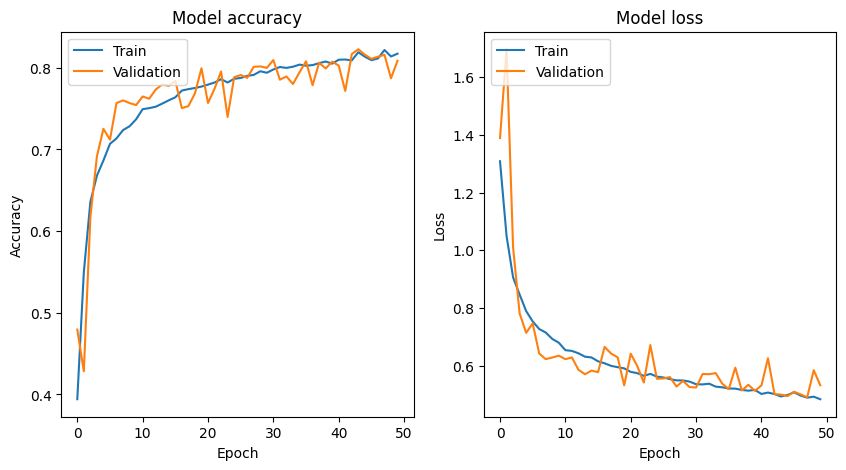

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_deeper.history['accuracy'])
plt.plot(history_cnn_deeper.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn_deeper.history['loss'])
plt.plot(history_cnn_deeper.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


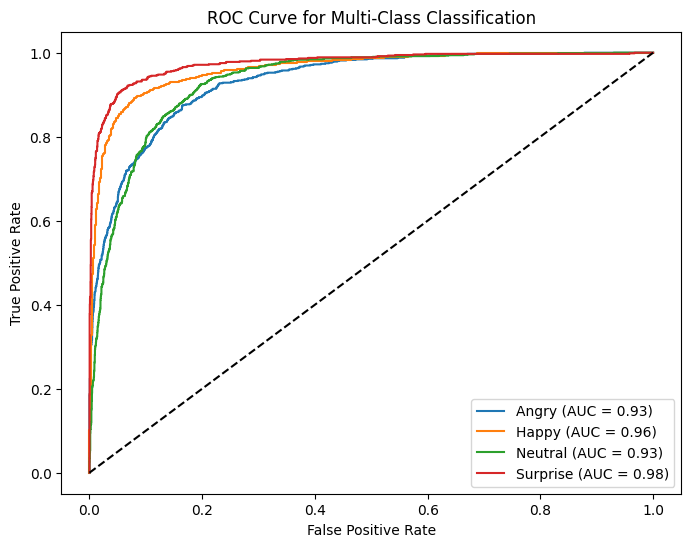

In [33]:
emotions=['Angry', 'Happy', 'Neutral','Surprise']

# Predict probabilities for the validation set
y_pred_prob = model_cnn_deeper.predict(X_val)

# Binarize the labels for multi-class ROC curve
y_val_bin = label_binarize(np.argmax(y_val, axis=1), classes=np.arange(4))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(emotions)):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(emotions)):
    plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

In [34]:
# prompt: precision and recall for the model

from sklearn.metrics import precision_score, recall_score

y_pred = np.argmax(model_cnn_deeper.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)

# Calculate precision and recall
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision: 0.8159
Recall: 0.8088
